In [22]:
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

from pathlib import Path
home = str(Path.home())
print("HOME_FOLDER is ",home)
print("weight saved at ",home + "\.deepface\weights")

def drawBBoxs(base_img, bboxs, col_dict, colour="blue"):
    output_img = base_img.copy()
    output_img = output_img[:, :, ::-1]

    output_img = Image.fromarray(np.uint8(output_img)).convert('RGB')
    draw = ImageDraw.Draw(output_img)

    for bbox in bboxs:
        try:
            colour = col_dict[bbox[5]]
        except:
            colour = "blue"
        x0 = bbox[0]
        x1 = bbox[0] + bbox[2]
        y0 = bbox[1]
        y1 = bbox[1] + bbox[3]
        draw.rectangle((x0, y0, x1, y1), outline=colour, width=5)
        draw.text((x0 + 10, y0 + 10), bbox[5], fill=colour)
#         draw.text((x0 + 10, y0 + 10), str(round(bbox[4],2)), fill=colour)

        output_img = np.array(output_img)
        output_img = output_img[:, :, ::-1]
        return output_img

HOME_FOLDER is  /Users/lzl
weight saved at  /Users/lzl\.deepface\weights


In [23]:
# Video Analysis

from deepface.commons.functions import initialize_detector, load_image, detect_face2
import numpy as np
import cv2
from PIL import Image, ImageDraw
current_frame = 1
video_path = 'dataset/demo3.mp4'
fps = 2
# detector_backend = 'ssd'
detector_backend = 'mtcnn'
grayscale = False
enforce_detection = False
return_region = False
db_folder = "db"

col_dict = {"ZuoLin" : "Green", "JiaPeng": "Red"}


initialize_detector(detector_backend = detector_backend)

cap = cv2.VideoCapture(video_path)

if (cap.isOpened()== False):
    print("Error opening video stream or file")

ret, frame = cap.read()
frame_width = frame.shape[1]
frame_height = frame.shape[0]
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), fps, (frame_width,frame_height))
out.write(frame)
# Read until video is completed
while(cap.isOpened()):
    current_frame += 1
    if current_frame % 10 == 0:
        print(current_frame, end = ", ")
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        img = load_image(frame)
        base_img = img.copy()
        
        # Add YOLO here
        bboxs = [[20, 20, 20, 20, 0.99, "Laptop"]]
        img = drawBBoxs(img, bboxs, col_dict)
        
        # Face Detection
        detections = detect_face2(img = base_img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
        if len(detections) == 0:
            out.write(img)
        else:
            bboxs = []
            face_count = 0
            for detection in detections:
                x, y, w, h = detection["box"]
                detected_face = base_img[int(y):int(y+h), int(x):int(x+w)]
                face_detected = "Unknown"
                try:
                    new_im = Image.fromarray(detected_face)
                    new_im.save("current.jpg")
                    df = DeepFace.find(img_path = "current.jpg", db_path = "db", enforce_detection=False)
                    df.sort_values('VGG-Face_cosine', inplace=True, ascending=True)
                    face_detected = re.split(r' |/|\\', df['identity'].iloc[0])[1]
                except:
                    pass
                bboxs.append([x, y, w, h, detection['confidence'],face_detected])
                
                
#                     #Save the face
#                     try:
#                         detected_face = base_img[int(y):int(y+h), int(x):int(x+w)]
#                         detected_face = detected_face[:, :, ::-1]
#                         new_im = Image.fromarray(detected_face)
#                         new_im.save(db_folder + "/new/" + str(current_frame) + "_" + str(face_count) + ".jpg")
#                     except:
#                         pass
                face_count += 1
                    
            output_img = drawBBoxs(img, bboxs, col_dict)
            out.write(output_img)
  # Break the loop
    else: 
        break
    
# When everything done, release the video capture object
cap.release()
out.release()

cv2.destroyAllWindows()


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

find function lasts  1.9257380962371826  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

find function lasts  1.8922810554504395  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

find function lasts  2.148444890975952  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

find function lasts  2.1137099266052246  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

find function lasts  1.7974872589111328  seconds
10, 


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

find function lasts  1.7750389575958252  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


find function lasts  1.948002815246582  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


find function lasts  2.2326858043670654  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


find function lasts  1.8970818519592285  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

find function lasts  1.8728671073913574  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

find function lasts  1.7985308170318604  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


find function lasts  2.395418167114258  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


find function lasts  1.9077832698822021  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

find function lasts  1.8819048404693604  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

find function lasts  1.919640064239502  seconds
20, 


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

find function lasts  2.1340689659118652  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

find function lasts  1.5916082859039307  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

find function lasts  1.7605650424957275  seconds


30, 

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

find function lasts  1.7551908493041992  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

find function lasts  1.9987692832946777  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

find function lasts  1.585089921951294  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

find function lasts  1.802886962890625  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

find function lasts  1.654500961303711  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

find function lasts  2.0526599884033203  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

find function lasts  1.8278419971466064  seconds



Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

find function lasts  1.6546728610992432  seconds
40, 

In [11]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img70.jpg", db_path = "db", enforce_detection=False)
print(df.head())
df.sort_values('VGG-Face_cosine', inplace=True, ascending=True)
result = re.split(r' |/|\\', df['identity'].iloc[0])[1]
print(result)

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

find function lasts  2.4260432720184326  seconds
              identity  VGG-Face_cosine
0  db\ZuoLin/352_0.jpg         0.040599
1  db\ZuoLin/347_0.jpg         0.041042
2  db\ZuoLin/346_0.jpg         0.053604
3  db\ZuoLin/348_0.jpg         0.055557
4  db\ZuoLin/326_0.jpg         0.057063
ZuoLin


In [12]:
# Video Analysis Old

from deepface.commons.functions import initialize_detector, load_image, detect_face2
import numpy as np
import cv2
from PIL import Image, ImageDraw
current_frame = 1
video_path = 'dataset/demo2.mp4'
# detector_backend = 'ssd'
detector_backend = 'mtcnn'
grayscale = False
enforce_detection = False
return_region = False
db_folder = "db"

initialize_detector(detector_backend = detector_backend)

cap = cv2.VideoCapture(video_path)

if (cap.isOpened()== False):
    print("Error opening video stream or file")

ret, frame = cap.read()
frame_width = frame.shape[1]
frame_height = frame.shape[0]
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))
out.write(frame)
# Read until video is completed
while(cap.isOpened()):
    current_frame += 1
    if current_frame % 10 == 0:
        print(current_frame, end = ", ")
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        img = load_image(frame)
        
        
        if detector_backend == 'ssd':
            original_size = img.shape
            target_size = (300, 300)
            aspect_ratio_x = (original_size[1] / target_size[1])
            aspect_ratio_y = (original_size[0] / target_size[0])
            base_img = img.copy()
            df = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)

            if df.shape[0] == 0: #No Face Detected
                out.write(img)

            else:

                df.sort_values('left', inplace=True)

                bboxs = []
                for index, instance in df.iterrows():
                    left = instance["left"]
                    right = instance["right"]
                    bottom = instance["bottom"]
                    top = instance["top"]
                    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
                    bboxs.append([int(left*aspect_ratio_x), int(top*aspect_ratio_y), int(right*aspect_ratio_x) - int(left*aspect_ratio_x), int(bottom*aspect_ratio_y) - int(top*aspect_ratio_y), instance['confidence']])

                output_img = drawBBoxs(base_img, bboxs)
                out.write(output_img)
                
        if detector_backend == 'mtcnn':
            base_img = img.copy()
            detections = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
            if len(detections) == 0:
                out.write(img)
            else:
                bboxs = []
                face_count = 0
                for detection in detections:
                    x, y, w, h = detection["box"]
                    bboxs.append([x, y, w, h, detection['confidence']])
#                     #Save the face
#                     try:
#                         detected_face = base_img[int(y):int(y+h), int(x):int(x+w)]
#                         detected_face = detected_face[:, :, ::-1]
#                         new_im = Image.fromarray(detected_face)
#                         new_im.save(db_folder + "/new/" + str(current_frame) + "_" + str(face_count) + ".jpg")
#                     except:
#                         pass
                    face_count += 1
                    
                output_img = drawBBoxs(base_img, bboxs)
                out.write(output_img)
  # Break the loop
    else: 
        break
    
# When everything done, release the video capture object
cap.release()
out.release()

cv2.destroyAllWindows()


10, 20, 30, 40, 50, 60, 

TypeError: drawBBoxs() missing 1 required positional argument: 'col_dict'

In [13]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img71.jpg", db_path = "db")
print(df.head())

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

find function lasts  2.6163289546966553  seconds
               identity  VGG-Face_cosine
0  db\JiaPeng/987_0.jpg         0.059045
1  db\JiaPeng/993_0.jpg         0.072321
2  db\JiaPeng/990_0.jpg         0.086272
3  db\JiaPeng/986_0.jpg         0.094457
4  db\JiaPeng/995_0.jpg         0.126340


In [14]:
from deepface.commons.functions import initialize_detector, preprocess_face, load_image, detect_face2
from PIL import Image, ImageDraw

detector_backend = 'mtcnn'
img_path = "dataset/img69.jpg"
grayscale = False
enforce_detection = False
return_region = False
initialize_detector(detector_backend)

img = load_image(img_path)
original_size = img.shape
detections = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
print(detections)

[{'box': [335, 132, 61, 82], 'confidence': 0.9999924898147583, 'keypoints': {'left_eye': (346, 165), 'right_eye': (373, 170), 'nose': (352, 187), 'mouth_left': (345, 191), 'mouth_right': (374, 195)}}, {'box': [177, 128, 63, 85], 'confidence': 0.999990701675415, 'keypoints': {'left_eye': (199, 161), 'right_eye': (228, 159), 'nose': (218, 178), 'mouth_left': (197, 187), 'mouth_right': (228, 185)}}, {'box': [270, 124, 61, 83], 'confidence': 0.9999877214431763, 'keypoints': {'left_eye': (293, 156), 'right_eye': (320, 163), 'nose': (306, 177), 'mouth_left': (286, 180), 'mouth_right': (314, 188)}}, {'box': [405, 150, 64, 83], 'confidence': 0.9999837875366211, 'keypoints': {'left_eye': (420, 182), 'right_eye': (448, 183), 'nose': (429, 200), 'mouth_left': (418, 208), 'mouth_right': (450, 210)}}, {'box': [479, 143, 60, 80], 'confidence': 0.9999462366104126, 'keypoints': {'left_eye': (488, 177), 'right_eye': (513, 174), 'nose': (495, 193), 'mouth_left': (492, 202), 'mouth_right': (520, 199)}}]


deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /Users/lzl/.deepface/weights/deploy.prototxt
28.1kB [00:00, 19.1MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /Users/lzl/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:01<00:00, 5.86MB/s]


Original Image


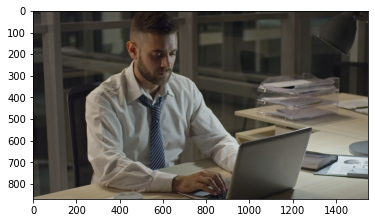

   img_id  is_face  confidence  left  top  right  bottom
0     0.0      1.0    0.958772    95   31    127     112


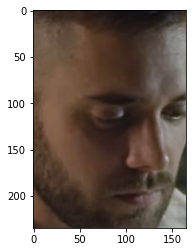

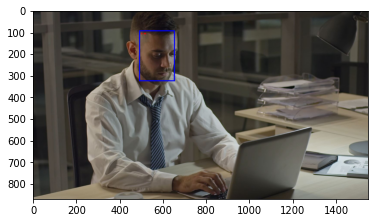

In [15]:
from deepface.commons.functions import initialize_detector, preprocess_face, load_image, detect_face2
from PIL import Image, ImageDraw

detector_backend = 'ssd'
img_path = "dataset/img68.jpg"
target_size=(224, 224)
grayscale = False
enforce_detection = False
return_region = False

initialize_detector(detector_backend)

# detect_face ssd
img = load_image(img_path)
original_size = img.shape
target_size = (300, 300)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

#Display original image
img2 = img[:, :, ::-1] #bgr to rgb
print("Original Image")
plt.imshow(img2)
plt.show()

base_img = img.copy()
df = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
df.sort_values('left', inplace=True)
print(df)

bboxs = []

for index, instance in df.iterrows():
    left = instance["left"]
    right = instance["right"]
    bottom = instance["bottom"]
    top = instance["top"]
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    bboxs.append([int(left*aspect_ratio_x), int(top*aspect_ratio_y), int(right*aspect_ratio_x) - int(left*aspect_ratio_x), int(bottom*aspect_ratio_y) - int(top*aspect_ratio_y), instance['confidence']])
    
    img2 = detected_face[:, :, ::-1]
    plt.imshow(img2)
    plt.show()
    
output_img = base_img.copy()
output_img = output_img[:, :, ::-1]

output_img = Image.fromarray(np.uint8(output_img)).convert('RGB')
draw = ImageDraw.Draw(output_img)

for bbox in bboxs:
    x0 = bbox[0]
    x1 = bbox[0] + bbox[2]
    y0 = bbox[1]
    y1 = bbox[1] + bbox[3]
    draw.rectangle((x0, y0, x1, y1), outline="blue", width=5)
    draw.text((x0 + 10, y0 + 10), str(round(bbox[4],2)), fill="red")


plt.imshow(output_img)
plt.show()

In [16]:
print(type(output_img))

<class 'PIL.Image.Image'>


In [17]:
result  = DeepFace.verify("dataset/img1.jpg", "dataset/img2.jpg")
print(result)
print("Is verified: ", result["verified"])

{'verified': True, 'distance': 0.2709779739379883, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}
Is verified:  True


In [18]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace"
#           , "Dlib"
         ]
for model in models:
    result = DeepFace.verify("dataset/img1.jpg", "dataset/img2.jpg", model_name = model)
    print(model)
    print(result)
    print()

VGG-Face
{'verified': True, 'distance': 0.2709779739379883, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}

facenet_weights.h5 will be downloaded...
Access denied with the following error:



 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1 



OSError: Unable to open file (unable to open file: name = '/Users/lzl/.deepface/weights/facenet_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img68.jpg", db_path = "db")
print(df.head())

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  786  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

find function lasts  2.6697869300842285  seconds
               identity  VGG-Face_cosine
0  db\JiaPeng/952_0.jpg         0.292512
1  db\JiaPeng/951_0.jpg         0.298244
2   db\ZuoLin/150_0.jpg         0.308439
3   db\ZuoLin/149_0.jpg         0.314481
4  db\JiaPeng/953_0.jpg         0.317857


opencv


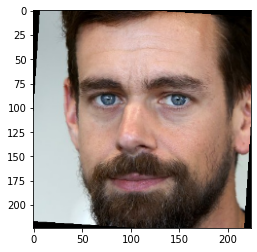

ssd


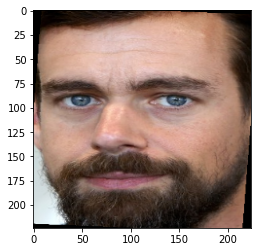

mtcnn


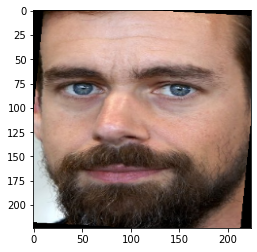

In [20]:
# Face Detectors
backends = ['opencv', 'ssd'
#             , 'dlib'
            , 'mtcnn']
for backend in backends:
   #face detection and alignment
    detected_face = DeepFace.detectFace("dataset/img61.jpg", detector_backend = backend)
    print(backend)
    plt.imshow(detected_face)
    plt.show()

In [ ]:
# DeepFace.stream(db_path = "db", model_name ='VGG-Face', distance_metric = 'cosine', enable_face_analysis = False, source = 'test.mkv', time_threshold = 5, frame_threshold = 5)